### About Datasets

- Context 
<span style="color: gray"><br>
This dataset deals with air pollution measurement information in Seoul, South Korea.<br>
Seoul Metropolitan Government provides many public data, including air pollution information, through the 'Open Data Plaza'.<br>
I made a structured dataset by collecting and adjusting various air pollution related datasets provided by the Seoul Metropolitan Government<br></span>
<br><br> 
- Content
<span style="color: gray"><br>
This data provides average values for six pollutants (SO2, NO2, CO, O3, PM10, PM2.5).<br>
Data were measured every hour between 2017 and 2019.<br>
Data were measured for 25 districts in Seoul.<br>
This dataset is divided into four files.<br><br>
(1) Measurement info: Air pollution measurement information<br>
    * 1 hour average measurement is provided after calibration
    * Instrument status:<br>
      \- 0: Normal, 1: Need for calibration, 2: Abnormal <br>
      \- 4: Power cut off, 8: Under repair, 9: abnormal data<br>
<br>
(2) Measurement item info: Information on air pollution measurement items<br>
(3) Measurement station info: Information on air pollution instrument stations<br>
(4) Measurement summary: A condensed dataset based on the above three data.<br>
</span>
<br><br>
- Acknowledgements
<span style="color: gray"><br>
Data is provided from here.<br>
<br>
    * https://data.seoul.go.kr/dataList/OA-15526/S/1/datasetView.do<br>
    * https://data.seoul.go.kr/dataList/OA-15516/S/1/datasetView.do<br>
    * https://data.seoul.go.kr/dataList/OA-15515/S/1/datasetView.do<br>
<span style="color: gray"><br>
Thank you to Seoul City, Seoul Open Data Plaza, and Air Quality Analysis Center for providing data.</span>
<br>  <br>  
------

In [192]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
#import plotly.graph_objects as go
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor


labelencoder = LabelEncoder()
%matplotlib inline

froot='/Users/jiwookim/Library/Mobile Documents/com~apple~CloudDocs/Documents/Lecture/Machine_Learning_2022-1/Term_Project/Measurement_summary.csv'
data= pd.read_csv(froot)
data.head()


O3df= data.loc[:,['Measurement date', 'Station code','O3']] #필요정보만 추출
O3df.head()

,Measurement date,Station code,O3
0,2017-01-01 00:00,101,0.002
1,2017-01-01 01:00,101,0.002
2,2017-01-01 02:00,101,0.002
3,2017-01-01 03:00,101,0.002
4,2017-01-01 04:00,101,0.002


preprocessig of null, nan, missing value(<0) 

In [193]:
#check Null
O3df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647511 entries, 0 to 647510
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  647511 non-null  object 
 1   Station code      647511 non-null  int64  
 2   O3                647511 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.8+ MB


In [194]:
#check num of NaN
O3df.iloc[:,2].isna().sum()

0

In [195]:
#check missing value (represented as negative value)

miss= O3df.loc[(O3df["O3"] < 0)]
print('num of negative value: ', miss.shape)

df= O3df.drop(miss.index, axis=0)
print('original data size: ',O3df.shape)
print('preprocessed data size: ',df.shape)

num of negative value:  (4059, 3)
original data size:  (647511, 3)
preprocessed data size:  (643452, 3)


In [196]:
fstation='/Users/jiwookim/Library/Mobile Documents/com~apple~CloudDocs/Documents/Lecture/Machine_Learning_2022-1/Term_Project/Measurement_station_info.csv'
station_info= pd.read_csv(fstation)
station_info.head()


,Station code,Station name(district),Address,Latitude,Longitude
0,101,Jongno-gu,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008
1,102,Jung-gu,"15, Deoksugung-gil, Jung-gu, Seoul, Republic o...",37.564263,126.974676
2,103,Yongsan-gu,"136, Hannam-daero, Yongsan-gu, Seoul, Republic...",37.540033,127.004850
3,104,Eunpyeong-gu,"215, Jinheung-ro, Eunpyeong-gu, Seoul, Republi...",37.609823,126.934848
4,105,Seodaemun-gu,"32, Segeomjeong-ro 4-gil, Seodaemun-gu, Seoul,...",37.593742,126.949679


In [197]:
#st102_index=df['Station code'] == 102
#st102= df[st102_index]
#st102.head(1)

In [198]:
#Loc= ((df.Longitude.min(),   df.Longitude.max(), df.Longitude.mean(),       
#         df.Latitude.min(), df.Latitude.max(), df.Latitude.mean()))
       

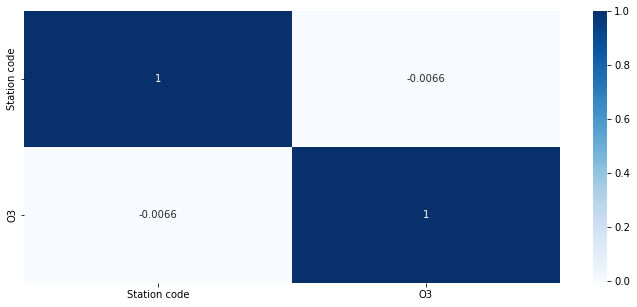

In [199]:
cols = df.columns[:50]
plt.figure(figsize = (12,5))
sns.heatmap(df[cols].corr(), annot = True, cmap= 'Blues')

fpath='/Users/jiwookim/Library/Mobile Documents/com~apple~CloudDocs/Documents/Lecture/Machine_Learning_2022-1/Term_Project/'
plt.savefig(fpath+'DataCorr_heatmap.eps')

In [200]:
for i in range(1,26):
  sc_data= df.loc[data['Station code'] == 100+i]  
  globals()['sc' + str(i)] =sc_data

sc1.head()

,Measurement date,Station code,O3
0,2017-01-01 00:00,101,0.002
1,2017-01-01 01:00,101,0.002
2,2017-01-01 02:00,101,0.002
3,2017-01-01 03:00,101,0.002
4,2017-01-01 04:00,101,0.002


### Estimate Ozone Density by 'Gu' of Seoul
<span>
1. Random Forest Regressor
</span>
<br><br>

In [201]:
Ozone= sc1.drop('Station code', axis=1)
Ozone.shape
type(O3)
Ozone.head()

,Measurement date,O3
0,2017-01-01 00:00,0.002
1,2017-01-01 01:00,0.002
2,2017-01-01 02:00,0.002
3,2017-01-01 03:00,0.002
4,2017-01-01 04:00,0.002


In [202]:
print(Ozone['Measurement date'].head())
Ozone.index= Ozone['Measurement date']
Ozone.set_index('Measurement date', inplace=True)
Ozone.head()
Ozone.info()

0    2017-01-01 00:00
1    2017-01-01 01:00
2    2017-01-01 02:00
3    2017-01-01 03:00
4    2017-01-01 04:00
Name: Measurement date, dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 25877 entries, 2017-01-01 00:00 to 2019-12-31 23:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   O3      25877 non-null  float64
dtypes: float64(1)
memory usage: 404.3+ KB


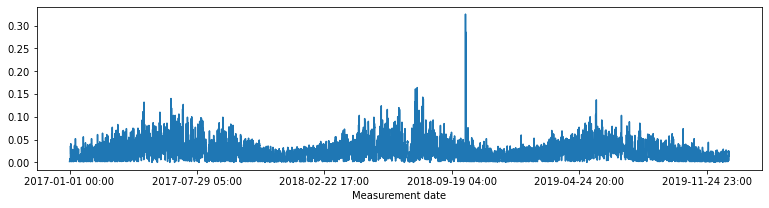

In [203]:
Ozone.plot(figsize=(13,3), legend=False)

plt.show()

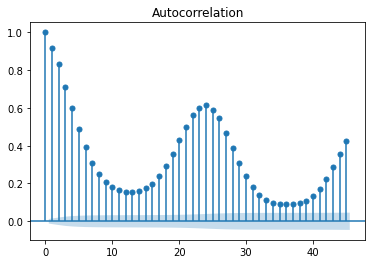

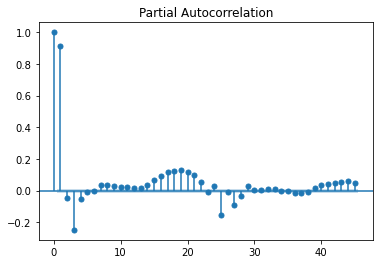

In [204]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(Ozone)
plot_pacf(Ozone)
plt.show()

<Figure size 720x216 with 0 Axes>

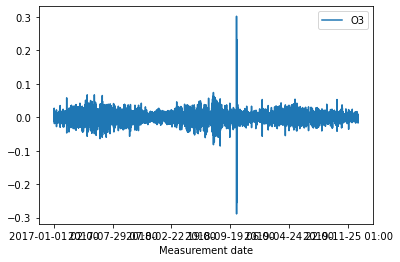

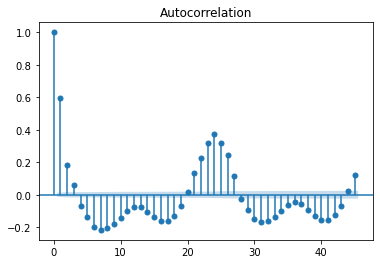

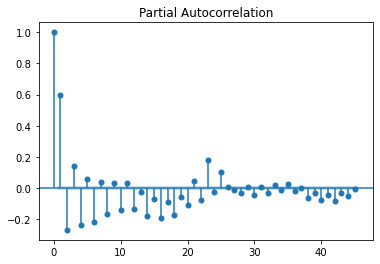

In [219]:
periods=2
diff_1=Ozone.diff(periods=periods).iloc[periods:]
plt.figure(figsize=(10,3))
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

In [221]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

arm= ARIMA(Ozone.O3.values, order=(0,2,2))#p (time lag. of AR),d (time lag. of MA),q(difference 차수)
arm_fit = arm.fit(trend='c', full_output=True, disp=True)
print(arm_fit.summary())

/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.42369D+00    |proj g|=  1.60897D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   1.609D+03  -3.424D+00
  F =  -3.4236860820765163     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/jiwookim/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                             ARIMA Model Results                              
Dep. Variable:                   D2.y   No. Observations:                25875
Model:                 ARIMA(0, 2, 2)   Log Likelihood               88587.877
Method:                       css-mle   S.D. of innovations              0.008
Date:                Sun, 12 Jun 2022   AIC                        -177167.755
Time:                        19:58:47   BIC                        -177135.111
Sample:                             2   HQIC                       -177157.206
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.032e-09   1.05e-08     -0.098      0.922   -2.17e-08    1.96e-08
ma.L1.D2.y    -0.9971      0.003   -297.871      0.000      -1.004      -0.991
ma.L2.D2.y    -0.0027      0.003     -0.821      0.4

<AxesSubplot:title={'center':'Residual'}>

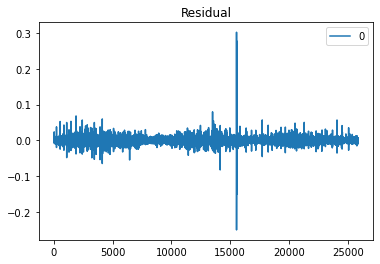

In [207]:
residuals = pd.DataFrame(arm_fit.resid)
residuals.plot(title = "Residual")

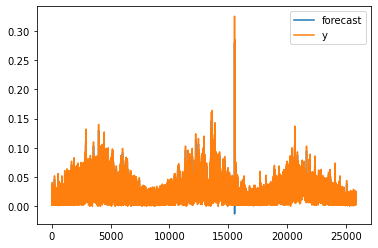

In [208]:
fig = arm_fit.plot_predict(alpha=0.9)